In [2]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [3]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


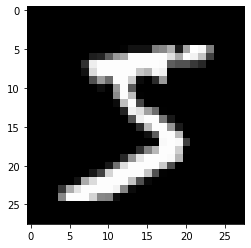

In [4]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

#### Numpy version

In [69]:
import numpy as np

def log_softmax_np(x):
    return x - np.log(np.exp(x).sum())

def model_np(xb):
    return (np.dot(xb, w) + b)

In [80]:
xt = x_train.detach().numpy()
w = np.random.randn(784,10)
b = np.random.randn(10)
bs = 64

In [81]:
xb = xt[0:bs]
preds = model_np(xb)
print(preds[0], preds.shape)

[ -9.14731007  13.14568573   0.39158975   3.49637459  -7.91814512
  -2.81799444  10.43671472  13.84279178 -12.71598729  -3.9823692 ] (64, 10)


#### Let's calculate the loss function

In [82]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [83]:
yt = y_train.detach().numpy()

In [85]:
yb = yt[0:bs]
print(loss_func(preds, yb))

1.8292933898343762


Convert our data to torch tensors

In [5]:
import torch

In [60]:
x_train, y_train, x_valid, y_valid = map(torch.tensor,
                                         (x_train, y_train, x_valid, y_valid))
n, c = x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


## Neural net from scratch
Using only PyTorch tensors

In [49]:
import math

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [63]:
xt = x_train.detach().numpy()

In [56]:
b = bias.detach().numpy()

In [53]:
w = weights.detach().numpy()

In [22]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return (xb @ weights + bias)


### Same as above but with numpy *run only before converting data to torch tensors

In [17]:
import numpy as np

In [29]:
x = np.array([2.1346, -0.7723,  0.4899, -0.5383, -0.6550, -0.6648, -0.3267, -0.2824,
          1.2660, -2.1440])

In [26]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

In [46]:
def log_softmax_np(x):
#     c = x.max()
#     logsumexp = np.log(np.exp(x - c).sum())
#     return x - c - logsumexp
    return x - np.log(np.exp(x).sum())

In [47]:
log_softmax_np(x)

array([-0.71636195, -3.62326195, -2.36106195, -3.38926195, -3.50596195,
       -3.51576195, -3.17766195, -3.13336195, -1.58496195, -4.99496195])

In [54]:
w

array([[-0.03300337,  0.02574478, -0.03080805, ..., -0.01286982,
        -0.03073921,  0.01705585],
       [-0.04348582,  0.05597554,  0.03956444, ...,  0.01253142,
        -0.02984388,  0.02110775],
       [-0.02260813, -0.02701391,  0.00248321, ..., -0.03455196,
         0.05249557,  0.00417066],
       ...,
       [-0.03112555, -0.02036141, -0.0289712 , ...,  0.08783496,
         0.02710501, -0.01866581],
       [-0.02369048,  0.02913035,  0.01823209, ...,  0.07528715,
        -0.00926355, -0.02597315],
       [-0.05496049,  0.05372922, -0.00918746, ..., -0.03669841,
         0.01451549,  0.0428885 ]], dtype=float32)

In [57]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [58]:
def model_np(xb):
    return (np.dot(xb, w) + b)

In [66]:
bs = 64
xb = xt[0:bs]
preds = model_np(xb)

In [68]:
preds[0], preds.shape

(array([-0.24406464, -0.3965678 , -0.09395523,  1.1316544 ,  0.93642354,
        -0.6479149 , -0.11252694, -0.7107513 , -0.09828124,  0.17245391],
       dtype=float32),
 (64, 10))

## Let's get back to PyTorch

We have previosly defined inputs, parameters, bias and batch size..

In [ ]:
xb = x_train[0:bs]
preds = model(xb)